In [1]:
#Importing libraries...
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #used for system files
import matplotlib.pyplot as plt #used for plotting
for dirname, _, filenames in os.walk('/kaggle/input'): #check for the file in the system
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv


In [2]:
#Reading file
df=pd.read_csv("/kaggle/input/2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv")
print(df.head()) 

                      Country  Gold Medal  Silver Medal  Bronze Medal  Total  \
0    United States of America          39            41            33    113   
1  People's Republic of China          38            32            18     88   
2                       Japan          27            14            17     58   
3               Great Britain          22            21            22     65   
4                         ROC          20            28            23     71   

   Rank By Total  
0              1  
1              2  
2              5  
3              4  
4              3  


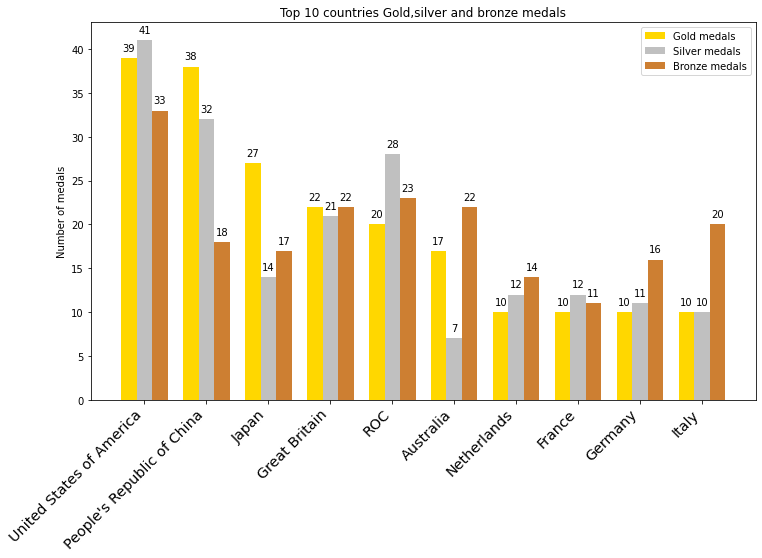

In [3]:
labels=df["Country"][:10] #get first 10 entries from Country column
gold_medals=df["Gold Medal"][:10] #get first 10 entries from Gold Medal column
silver_medals=df["Silver Medal"][:10]#get first 10 entries from Silver Medal column
bronze_medals=df["Bronze Medal"][:10]#get first 10 entries from Bronze Medal column

x = np.arange(len(labels))  # transform the label length into a numpy array
width = 0.25  # the width of the bars
fig,ax= plt.subplots(figsize=(10,6))  #creates a figure and a set of subplots, figsize for the size of the plot
gold_bars=ax.bar(x-width,gold_medals,width,label='Gold medals',color="#FFD700") #creating bars for each category
silver_bars=ax.bar(x,silver_medals,width,label='Silver medals',color="#C0C0C0")#spaced by width
bronze_bars=ax.bar(x+width,bronze_medals,width,label='Bronze medals',color="#CD7F32")#with custom colors
ax.set_ylabel("Number of medals") #Title of y axis
ax.set_title("Top 10 countries Gold,silver and bronze medals") #title of plot
ax.set_xticks(x) #setting ticks of chart to the numpy array created
ax.set_xticklabels(labels) #setting the labels as well
ax.legend() #creating the legend
ax.bar_label(gold_bars,padding=5)#adding labels to each bar with a padding of 5 between text and bar
ax.bar_label(silver_bars,padding=5)
ax.bar_label(bronze_bars,padding=5)
fig.tight_layout() #adjusts subplot params so that the subplot(s) fits in to the figure area
plt.xticks( #creates the rotated country labels
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show() #shows the plot

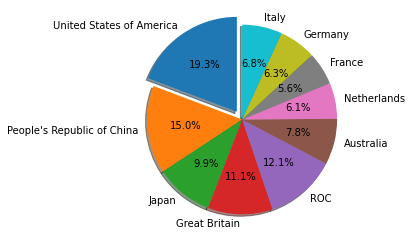

In [4]:
labels=df["Country"][:10] #get first 10 entries from Country column
sizes=df["Total"][:10] #get first 10 entries from Total column
explode = np.zeros(len(sizes)) #create a numpy array full of 0
explode[sizes.argmax()] = 0.1 #assign 0.1 to the maximum value 
fig1,ax1=plt.subplots() #creates a figure and a set of subplots, figsize for the size of the plot
ax1.pie(sizes, #create the pie
explode=explode, #adds the explode feature to USA
labels=labels, #adds the labels
autopct='%1.1f%%', #formating for numbers inside the pie
shadow=True, #adds shadow 
startangle=90) #adds the start angle to the pie
ax1.axis('equal') #makes the pie a circle
plt.show() #shows the plot

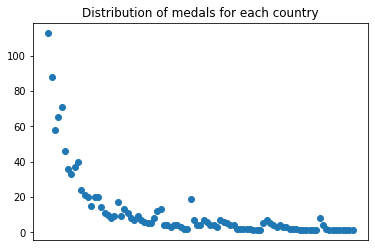

In [5]:
labels=df["Country"] #get entries from Country column
sizes=df["Total"] #get entries from Total column
plt.xticks([]) #remove ticks from x axis
plt.title("Distribution of medals for each country") #add title to plot
plt.scatter(labels,sizes); #create the scatter plot


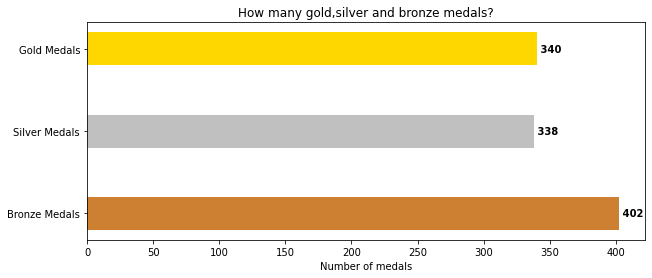

In [6]:
number_gold=df["Gold Medal"].sum() #count the gold medals
number_silver=df["Silver Medal"].sum() #count the silver medals
number_bronze=df["Bronze Medal"].sum() #count the bronze medals
fig,ax=plt.subplots(figsize=(10,4)) #creates a figure and a set of subplots, figsize for the size of the plot
medals=["Gold Medals","Silver Medals","Bronze Medals"] #medal names array
number=[number_gold,number_silver,number_bronze] #number of medals array
y_pos = np.arange(len(medals)) #creating a numpy array for the ticks

ax.barh(y_pos,number,0.4, align='center',color=["#FFD700","#C0C0C0","#CD7F32"]) #creating the bars with custom colors
ax.set_yticks(y_pos) #setting the ticks
ax.set_yticklabels(medals) #setting the ticks labels
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of medals') #setting the x label
ax.set_title('How many gold,silver and bronze medals?') #setting the plot table
for i, v in enumerate(number):
    plt.text(v, i, " "+str(v), color='black', va='center', fontweight='bold') #add the number of medals to the plot
plt.show();#show the plot

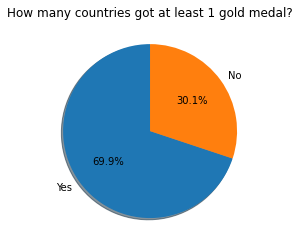

In [7]:
countries_without_medals=df["Gold Medal"].isin([0]).sum() #number of countries without medals(tried with isnull,but this worked)
countries_with_medals=df["Gold Medal"].count()-countries_without_medals #the countries with medals is the difference
labels=["Yes","No"] #labels for the pie
sizes=[countries_with_medals,countries_without_medals] #number of medals
fig2,ax2=plt.subplots() #creating the subplots
ax2.pie(sizes,
explode=None,  #adding no explode
labels=labels,  #adding labels
autopct='%1.1f%%',  #adding numbers formatting
shadow=True,  #adding shadow
startangle=90)  #adding the start angle
plt.title("How many countries got at least 1 gold medal?") #adding title
plt.show(); #showing the plot